# **Lab 5: Orthogonality, Orthonormality & Least Squares**

# **Initialization**

In [52]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

# **Linear Dependence**

[Linear Independence](https://en.wikipedia.org/wiki/Linear_independence)

[Cauchy–Schwarz Inequality](https://en.wikipedia.org/wiki/Cauchy%E2%80%93Schwarz_inequality)



In [53]:
def check_linear_independence(A):

  lambdas, V =  np.linalg.eig(A.T)

  print(lambdas)

  print(V)


  # for i in range(A.shape[0]):

  #     for j in range(matrix.shape[0]):
  #         if i != j:
  #             inner_product = np.inner(
  #                 matrix[:,i],
  #                 matrix[:,j]
  #             )
  #             norm_i = np.linalg.norm(matrix[:,i])
  #             norm_j = np.linalg.norm(matrix[:,j])

  #             print 'I: ', matrix[:,i]
  #             print 'J: ', matrix[:,j]
  #             print 'Prod: ', inner_product
  #             print 'Norm i: ', norm_i
  #             print 'Norm j: ', norm_j
  #             if np.abs(inner_product - norm_j * norm_i) < 1E-5:
  #                 print 'Dependent'
  #             else:
  #                 print 'Independent'

# **Gram-Schmidt Orthogonalization Process & QR Factorization**

In [54]:
def normalize(v):

    return v / np.sqrt(v.dot(v))

def gram_schmidt_process(A):

  m, n = A.shape
  
  A[:, 0] = normalize(A[:, 0])

  for i in range(1, n):

    A_i = A[:, i]

    for j in range(0, i):

        A_j = A[:, j]

        coefficient = A_i.dot(A_j)

        A_i = A_i - coefficient * A_j

    A[:, i] = normalize(A_i)

  return A

def qr_factorization(A):

    m, n = A.shape

    Q = gram_schmidt_process(A)

    R = np.dot(Q.T, A)

    return Q, R

In [55]:
A = np.array([[1, 7, -1, 3, 1],
              [0, 3, 4, 1, 7],
              [6, 2, 0, 2, -1],
              [2, 1, 2, 0, 2],
              [3, 4, 1, -2, 1]], dtype=float)

print("Input Matrix")

print(A, A.shape)

# check_linear_independence(A)

A_GS = gram_schmidt_process(A)

print("Orthogonal Matrix")

print(A_GS)

Q, R = qr_factorization(A)

print("Q")

print(Q)

print("R")

print(R)

Input Matrix
[[ 1.  7. -1.  3.  1.]
 [ 0.  3.  4.  1.  7.]
 [ 6.  2.  0.  2. -1.]
 [ 2.  1.  2.  0.  2.]
 [ 3.  4.  1. -2.  1.]] (5, 5)
Orthogonal Matrix
[[ 0.14142136  0.83813761 -0.42053217  0.25967742 -0.18233396]
 [ 0.          0.39659509  0.80362181  0.26910349  0.35282805]
 [ 0.84852814 -0.25910879 -0.10598401  0.37547501  0.24626924]
 [ 0.28284271 -0.04230348  0.39825232  0.01557947 -0.87141425]
 [ 0.42426407  0.26704069  0.08664386 -0.84789548  0.14918233]]
Q
[[ 0.14142136  0.83813761 -0.42053217  0.25967742 -0.18233396]
 [ 0.          0.39659509  0.80362181  0.26910349  0.35282805]
 [ 0.84852814 -0.25910879 -0.10598401  0.37547501  0.24626924]
 [ 0.28284271 -0.04230348  0.39825232  0.01557947 -0.87141425]
 [ 0.42426407  0.26704069  0.08664386 -0.84789548  0.14918233]]
R
[[ 1.00000000e+00  1.98134860e-17 -1.74032376e-17 -2.39365577e-17
  -2.79142813e-17]
 [ 1.98134860e-17  1.00000000e+00 -2.80866635e-17  4.71664329e-17
  -1.28745669e-18]
 [-1.74032376e-17 -2.80866635e-17  1.000

# **Polynomial Interpolation & Least-Square Fitting Problems**

In this assignment, we will examine polynomial interpolation and least square fitting of polynomials to a set of points. 

  **Input**: Suppose we have n points: 

  $$(t_{1}, y_{1}), (t_{2}, y_{2}),... , (t_{n}, y_{n}).$$

**Q1: Polynomial Interpolation** 

[Polynomial Interpolation](https://en.wikipedia.org/wiki/Polynomial_interpolation)

First, we would like to fit a polynomial of degree $n-1$ to the set of points, i.e. we will fit a polynomial:

  $p(t) = c_{0} + c_{1}t +...+ c_{n−1}t^{n−1}$

so that it goes through all the n points. 

Our task is to find the coefficients 

$c_{0}, c_{1},..., c_{n−1}$

In this assignment n = 7, we will fit a 6-degree polynomial. 

The 7 points are as follows

In [56]:
data_points = np.array([[1, 4], 
                        [3, 7], 
                        [4, 2], 
                        [7, 2],
                        [10, 5], 
                        [12, 10], 
                        [15, 4]])

print(data_points, data_points.shape)

[[ 1  4]
 [ 3  7]
 [ 4  2]
 [ 7  2]
 [10  5]
 [12 10]
 [15  4]] (7, 2)


1. Plot the data points

No handles with labels found to put in legend.


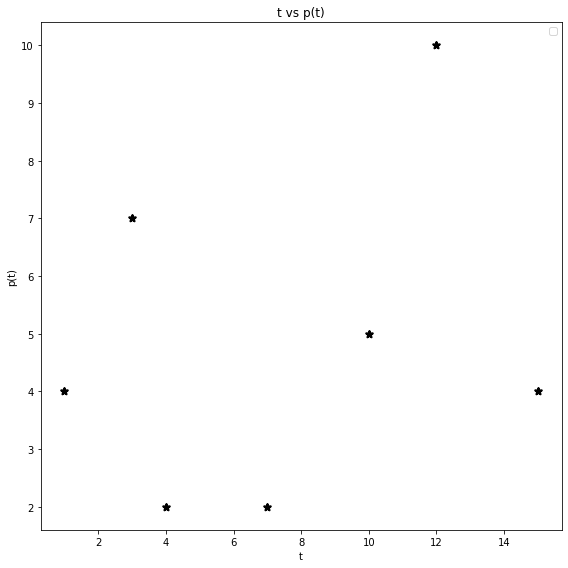

In [57]:
fig_width = 8

fig_height = 8

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, fig_height))

ax.set_xlabel('t')

ax.set_ylabel('p(t)')

ax.set_title('t vs p(t)')

ax.scatter(data_points[:,0],
           data_points[:,1], 
           marker="*",
           s = 50, 
           color="black", 
           linewidth=2)

plt.legend()

plt.tight_layout()

plt.show()

2. To represent the n conditions 

  $p(t_{i}) = y_{i}$

  that the polynomial must satisfy, set up the system of equations $Ac = y$, where $c$ is the vector of coefficients and $y$ is the vectors of the $y_{i}$’s. 
  
  The matrix $A$, called
the Vandermonde matrix, represents the coefficients of the n linear equations (linear in terms of the $c_{i}$’s).

  [Vandermonde Matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix)

3. Write the polynomial equations in terms of the given data points

*  For the given values,

  $p(1) = c_{0} + c_{1}*1 + c_{2}*1^{2} + c_{3}*1^{3} + c_{4}*1^{4} + c_{5}*1^{5} + c_{6}1^{6} = 4$
  
  $p(3) = c_{0} + c_{1}*3 + c_{2}*3^{2} + c_{3}*3^{3} + c_{4}*3^{4} + c_{5}*3^{5} + c_{6}*3^{6} = 7$
  
  $p(4) = c_{0} + c_{1}*4 + c_{2}*4^{2} + c_{3}*4^{3} + c_{4}*4^{4} + c_{5}*4^{5} + c_{6}*4^{6} = 2$
  
  $p(7) = c_{0} + c_{1}*7 + c_{2}*7^{2} + c_{3}*7^{3} + c_{4}*7^{4} + c_{5}*7^{5} + c_{6}*7^{6} = 2$
  
  $p(10) = c_{0} + c_{1}*10 + c_{2}*10^{2} + c_{3}*10^{3} + c_{4}*10^{4} + c_{5}*10^{5} + c_{6}*10^{6} = 5$
  
  $p(12) = c_{0} + c_{1}*12 + c_{2}*12^{2} + c_{3}*12^{3} + c_{4}*12^{4} + c_{5}*12^{5} + c_{6}*12^{6} = 10$
  
  $p(15) = c_{0} + c_{1}*15 + c_{2}*15^{2} + c_{3}*15^{3} + c_{4}*15^{4} + c_{5}*15^{5} + c_{6}*15^{6} = 4$

4. Write a function that will produce the vandermonde matrix given the data points.

In [58]:
def generate_vandermonde_matrix(data_points, data_type):

  vandermonde_matrix = np.zeros((data_points.shape[0], data_points.shape[0]), dtype=data_type)

  for i, data_point in enumerate(data_points):

    for j in range(data_points.shape[0]):
      
      vandermonde_matrix[i][j] = data_point[0]**j

  return vandermonde_matrix

vandermonde_matrix = generate_vandermonde_matrix(data_points, float)

print(vandermonde_matrix, vandermonde_matrix.shape)

[[1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0000000e+00]
 [1.0000000e+00 3.0000000e+00 9.0000000e+00 2.7000000e+01 8.1000000e+01
  2.4300000e+02 7.2900000e+02]
 [1.0000000e+00 4.0000000e+00 1.6000000e+01 6.4000000e+01 2.5600000e+02
  1.0240000e+03 4.0960000e+03]
 [1.0000000e+00 7.0000000e+00 4.9000000e+01 3.4300000e+02 2.4010000e+03
  1.6807000e+04 1.1764900e+05]
 [1.0000000e+00 1.0000000e+01 1.0000000e+02 1.0000000e+03 1.0000000e+04
  1.0000000e+05 1.0000000e+06]
 [1.0000000e+00 1.2000000e+01 1.4400000e+02 1.7280000e+03 2.0736000e+04
  2.4883200e+05 2.9859840e+06]
 [1.0000000e+00 1.5000000e+01 2.2500000e+02 3.3750000e+03 5.0625000e+04
  7.5937500e+05 1.1390625e+07]] (7, 7)


5. Since the Vandermonde matrix is invertible if $t_{i} \neq t{j}$, for $i \neq j$, we can
simply find $c$ using $c = A^{-1}*y$. Now write a function that will take the data points as input and find the value of the coefficients $c_{0}, ..., c_{n-1}$

In [59]:
def calculate_coefficients(data_points):

  vandermonde_matrix = generate_vandermonde_matrix(data_points, float)

  vandermonde_matrix_inverse = np.linalg.inv(vandermonde_matrix)

  c = np.dot(vandermonde_matrix_inverse, data_points[:, 1])

  return c

c = calculate_coefficients(data_points)   

print("Coefficient: {0}".format(c), c.shape)

Coefficient: [-3.37575758e+01  6.28880231e+01 -3.12842232e+01  6.86690316e+00
 -7.52765753e-01  4.04882155e-02 -8.49767516e-04] (7,)


6. Write a function that takes the coefficents and the independent value to produce an output.

In [60]:
def p(c, x):

  result = 0

  for i, c_value in enumerate(c):

    result = result + c_value * x**i

  return result 

output = p(c, 15)

print("Output: {0}".format(output))

Output: 3.999999999994543


7. Find and inverse of the vandermonde matrix using the QR decomposition. Recalculate the coefficeint again and check with the previously calculated coefficients.

*  We know, For square non-singular matrix,

  $A=QR$
  
  $A^{-1}=(QR)^{-1}$
  
  $A^{-1}=R^{-1}Q^{-1}$
  
  $A^{-1}=R^{-1}Q^{T}$

In [61]:
def calculate_coefficients_qr(data_points):

  vandermonde_matrix = generate_vandermonde_matrix(data_points, float)

  Q, R = qr_factorization(vandermonde_matrix)

  vandermonde_matrix_inverse_qr = np.dot(np.linalg.inv(R), Q.T)

  c_qr = np.dot(vandermonde_matrix_inverse_qr, data_points[:, 1])

  return c_qr

c_qr = calculate_coefficients(data_points)   

print("Coefficient using QR: {0}".format(c_qr), c_qr.shape)

difference_norm = np.linalg.norm(c - c_qr)

print("Norm of c and c_qr is {0}".format(difference_norm))

Coefficient using QR: [-3.37575758e+01  6.28880231e+01 -3.12842232e+01  6.86690316e+00
 -7.52765753e-01  4.04882155e-02 -8.49767516e-04] (7,)
Norm of c and c_qr is 0.0


8. Plot the points and the Polynomial.

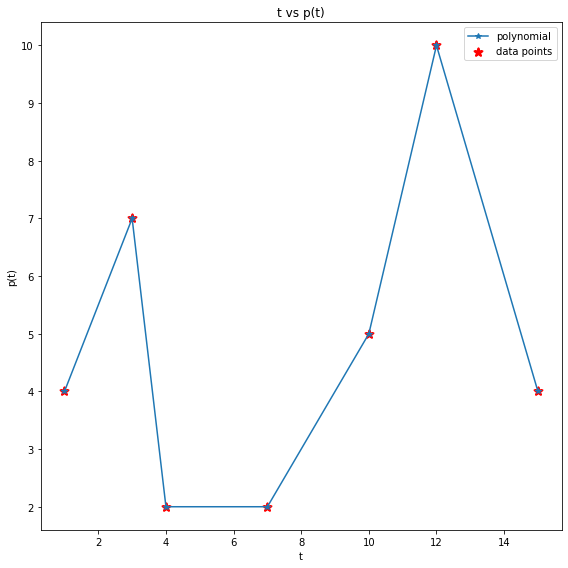

In [62]:
fig_width = 8

fig_height = 8

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, fig_height))

ax.set_xlabel('t')

ax.set_ylabel('p(t)')

ax.set_title('t vs p(t)')

ax.scatter(data_points[:,0],
           data_points[:,1], 
           marker="*",
           s = 70,
           color = 'red', 
           linewidth=2,
           label = 'data points')

ax.plot(data_points[:,0],
        p(c, data_points[:,0]), 
        marker="*",
        label = 'polynomial')

plt.legend()

plt.tight_layout()

plt.show()

9. Now take n random data points and run the same procedure to find the polynomial

In [63]:
n = 10

data_points = np.random.randint(1,50, (n, 2))

print(data_points, data_points.shape)

[[ 9  8]
 [35 49]
 [25  5]
 [47 43]
 [ 6 33]
 [ 8 28]
 [12 43]
 [42 41]
 [21 21]
 [ 5 34]] (10, 2)


In [64]:
fig_width = 8

fig_height = 8

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, fig_height))

ax.set_xlabel('t')

ax.set_ylabel('p(t)')

ax.set_title('t vs p(t)')

ax.scatter(data_points[:,0],
           data_points[:,1], 
           marker="*",
           s = 50, 
           linewidth=2)

plt.legend()

plt.tight_layout()

plt.show()

No handles with labels found to put in legend.


In [65]:
c = calculate_coefficients(data_points)   

print("Coefficient: {0}".format(c), c.shape)

Coefficient: [ 9.22485278e+03 -6.81206165e+03  2.07867178e+03 -3.40767070e+02
  3.29677465e+01 -1.95377456e+00  7.12670065e-02 -1.55311706e-03
  1.84803284e-05 -9.21097111e-08] (10,)


In [66]:
fig_width = 8

fig_height = 8

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, fig_height))

ax.set_xlabel('t')

ax.set_ylabel('p(t)')

ax.set_title('t vs p(t)')

ax.scatter(data_points[:,0],
           data_points[:,1], 
           marker="*",
           s = 70,
           color = 'red', 
           linewidth=2,
           label = 'data points')

ax.plot(data_points[:,0],
        p(c, data_points[:,0]), 
        marker="*",
        label = 'polynomial')

plt.legend()

plt.tight_layout()

plt.show()

**Q2: Polynomial Interpolation using two Cubic Polynomials** 

In this part, you we will fit the following two cubic polynomials $p(t)$ and $q(t)$ to the n points:

$p(t) = c_{0} + c_{1}t + c_{2}t^
{2} + c_{3}t^{3}$

$q(t) = d_{0} + d_{1}t + d_{2}t^{2} + d_{3}t^{3}$

that satisfies the following conditions:

$p(1) = 4$,

$p(3) = 7$,

$p(4) = 2$,

$q(10) = 5$, 

$q(12) = 10$, 

$q(15) = 4$

$p(7) = q(7)$ and $p^{’}(7) = q^{’}(7)$ 


$p^{’}(7)$ and $q^{’}(7)$ are the derivatives of $p(t)$ and $q(t)$ at t = 7 respectively.

1. Use the given data points to write the polynomial equations.

  * For the given data points

  $p(1) = c_{0} + c_{1}*1 + c_{2}*1^{2} + c_{3}*1^{3} = 4$

  $p(3) = c_{0} + c_{1}*3 + c_{2}*3^{2} + c_{3}*3^{3} = 7$

  $p(4) = c_{0} + c_{1}*4 + c_{2}*4^{2} + c_{3}*4^{3} = 2$

  $q(10) = d_{0} + d_{1}*10 + d_{2}*10^{2} + d_{3}*10^{3} = 5$

  $q(12) = d_{0} + d_{1}*12 + d_{2}*12^{2} + d_{3}*12^{3} = 10$

  $q(15) = d_{0} + d_{1}*15 + d_{2}*15^{2} + d_{3}*15^{3} = 4$

2. Set up a system of equations, $Ax = b$ that satisfies the conditions, where 

  $x = (c_{0}, c_{1}, c_{2}, c_{3}, d_{0}, d_{1}, d_{2}, d_{3})$

  * For the given data points

  $p(1) + q(0)= c_{0} + c_{1}*1 + c_{2}*1^{2} + c_{3}*1^{3} + d_{0} + d_{1}*0 + d_{2}*0^{2} + d_{3}*0^{3}  = 4$

  $p(3) + q(0) = c_{0} + c_{1}*3 + c_{2}*3^{2} + c_{3}*3^{3} + d_{0} + d_{1}*0 + d_{2}*0^{2} + d_{3}*0^{3}  = 7$

  $p(4) + q(0) = c_{0} + c_{1}*4 + c_{2}*4^{2} + c_{3}*4^{3} + d_{0} + d_{1}*0 + d_{2}*0^{2} + d_{3}*0^{3} = 2$

  $p(0) + q(10) = c_{0} + c_{1}*0 + c_{2}*0^{2} + c_{3}*0^{3} + d_{0} + d_{1}*10 + d_{2}*10^{2} + d_{3}*10^{3}  = 5$

  $p(0) + q(12) = c_{0} + c_{1}*0 + c_{2}*0^{2} + c_{3}*0^{3} + d_{0} + d_{1}*12 + d_{2}*12^{2} + d_{3}*12^{3}  = 10$

  $p(0) + q(15) = c_{0} + c_{1}*0 + c_{2}*0^{2} + c_{3}*0^{3} + d_{0} + d_{1}*15 + d_{2}*15^{2} + d_{3}*15^{3} $

  * We also have, 

  $p(7) = q(7)$

  $c_{0} + c_{1}*7 + c_{2}*7^{2} + c_{3}*7^{3} = d_{0} + d_{1}*7 + d_{2}*7^{2} + d_{3}*7^{3}$

  $c_{0} + c_{1}*7 + c_{2}*7^{2} + c_{3}*7^{3} - d_{0} - d_{1}*7 - d_{2}*7^{2} - d_{3}*7^{3} = 0$

  and,

  $p^{'}(7) = q^{'}(7)$

  $0 + c_{1} + c_{2}*2*7 + c_{3}*3*7^{2} = 0 + d_{1} + d_{2}*2*7 + d_{3}*3*7^{2}$

  $0 + c_{1} + c_{2}*2*7 + c_{3}*3*7^{2} - 0 - d_{1} - d_{2}*2*7 - d_{3}*3*7^{2}=0$





3. Plot the data points

In [67]:
data_points = np.array([[1, 4], 
                        [3, 7], 
                        [4, 2], 
                        [7, 2],
                        [10, 5], 
                        [12, 10], 
                        [15, 4]])

print(data_points, data_points.shape)

[[ 1  4]
 [ 3  7]
 [ 4  2]
 [ 7  2]
 [10  5]
 [12 10]
 [15  4]] (7, 2)


In [68]:
fig_width = 8

fig_height = 8

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, fig_height))

ax.set_xlabel('t')

ax.set_ylabel('p(t) and q(t)')

ax.set_title('t vs p(t) and q(t)')

ax.scatter(data_points[:3,0],
           data_points[:3,1], 
           marker="*",
           s = 50,
           linewidth=2,
           label = 't vs p(t)')

ax.scatter(data_points[3,0],
           data_points[3,1], 
           marker="x",
           s = 50,
           linewidth=2,
           label = 'q(t) = p(t)')

ax.scatter(data_points[4:,0],
           data_points[4:,1], 
           marker="o",
           s = 50,
           linewidth=2,
           label = 't vs q(t)')

plt.legend()

plt.tight_layout()

plt.show()

4. Write a function to build the Vandermonde Matrix of such system from the given data points

In [69]:
def generate_vandermonde_matrix(data_points, equality_point_index, data_type):

    data_points_altered = np.append(np.append(data_points[:(equality_point_index + 1), :], 
                                              data_points[equality_point_index, :]),
                                              data_points[(equality_point_index + 1):]).reshape(data_points.shape[0] + 1, 2)

    vandermonde_matrix = np.zeros((data_points_altered.shape[0], data_points_altered.shape[0]), dtype=data_type)

    for i, data_point in enumerate(data_points_altered):

        if i == equality_point_index:

            sign = 1

            exponent = 0

            for j in range(data_points_altered.shape[0]):

                if j == int(data_points_altered.shape[0] / 2):
                    sign = sign * -1

                    exponent = 0

                vandermonde_matrix[i][j] = sign * data_point[0] ** exponent

                exponent = exponent + 1

        elif i == (equality_point_index + 1):

            sign = 1

            exponent = 0

            for j in range(data_points_altered.shape[0]):

                if j == int(data_points_altered.shape[0] / 2):

                    sign = sign * -1

                    exponent = 0

                vandermonde_matrix[i][j] = sign * exponent * data_point[0] ** (1 if exponent == 0 else exponent - 1)

                exponent = exponent + 1

        else:

            if i < equality_point_index:

                j = 0

            elif i > equality_point_index:

                j = int(data_points_altered.shape[0] / 2)

            for exponent in range(int(data_points_altered.shape[0] / 2)):

                vandermonde_matrix[i][j] = data_point[0] ** exponent

                j = j + 1

                exponent = exponent + 1 

    return vandermonde_matrix, data_points_altered

vandermonde_matrix, data_points_altered = generate_vandermonde_matrix(data_points, 3, int)

print(vandermonde_matrix, vandermonde_matrix.shape)


[[   1    1    1    1    0    0    0    0]
 [   1    3    9   27    0    0    0    0]
 [   1    4   16   64    0    0    0    0]
 [   1    7   49  343   -1   -7  -49 -343]
 [   0    1   14  147    0   -1  -14 -147]
 [   0    0    0    0    1   10  100 1000]
 [   0    0    0    0    1   12  144 1728]
 [   0    0    0    0    1   15  225 3375]] (8, 8)


5. Since the Vandermonde matrix is invertible if $t_{i} \neq t{j}$, for $i \neq j$, we can
simply find $x$ using $x = A^{-1}*b$. Now write a function that will take the data points as input and find the value of the coefficients $c_{0}, ..,c_{k},d_{k+1}..., d_{n-1}$

In [70]:
def calculate_coefficients(data_points, equality_point_index, data_type):

  vandermonde_matrix, data_points_altered = generate_vandermonde_matrix(data_points, equality_point_index, data_type)

  vandermonde_matrix_inverse = np.linalg.inv(vandermonde_matrix)

  x = np.dot(vandermonde_matrix_inverse, data_points_altered[:, 1])

  return x

coefficients = calculate_coefficients(data_points, 3, float)   

print("Coefficient: {0}".format(coefficients), coefficients.shape)

Coefficient: [ -9.71893491  19.22164694  -5.97928994   0.47657791  11.70414201
 -12.6260355    1.97169625  -0.07761341] (8,)


6. Write a function that takes the coefficents and the independent value to produce an output.

In [71]:
def p(coefficients, x):

  result = 0

  i = 0

  j = int(coefficients.shape[0]/2)

  exponent = 0

  for _ in range(int(coefficients.shape[0]/2)):

    result = result + (coefficients[i] + coefficients[j])*x**exponent

    print(coefficients[i], coefficients[j])

    i = i + 1

    j = j + 1

    exponent = exponent + 1

  return result 

output = p(coefficients, 15)

print("Output: {0}".format(output))

-9.718934911242664 11.704142011834051
19.221646942800877 -12.626035502958558
-5.97928994082843 1.9716962524654829
0.4765779092702189 -0.07761341222879681
Output: 545.7159763313628


7. Plot the points and the polynomial

-9.718934911242664 11.704142011834051
19.221646942800877 -12.626035502958558
-5.97928994082843 1.9716962524654829
0.4765779092702189 -0.07761341222879681


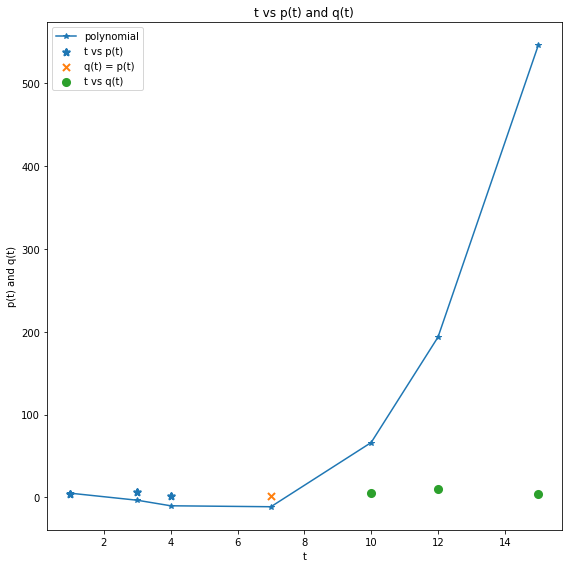

In [72]:
fig_width = 8

fig_height = 8

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, fig_height))

ax.set_xlabel('t')

ax.set_ylabel('p(t) and q(t)')

ax.set_title('t vs p(t) and q(t)')

ax.scatter(data_points[:3,0],
           data_points[:3,1], 
           marker="*",
           s = 50,
           linewidth=2,
           label = 't vs p(t)')

ax.scatter(data_points[3,0],
           data_points[3,1], 
           marker="x",
           s = 50,
           linewidth=2,
           label = 'q(t) = p(t)')

ax.scatter(data_points[4:,0],
           data_points[4:,1], 
           marker="o",
           s = 50,
           linewidth=2,
           label = 't vs q(t)')

ax.plot(data_points[:,0],
        p(coefficients, data_points[:,0]), 
        marker="*",
        label = 'polynomial')


plt.legend()

plt.tight_layout()

plt.show()

8. Now take n random data points and run the same procedure to find the polynomial

In [73]:
n = 9

data_points = np.random.randint(1,50, (n, 2))

print(data_points, data_points.shape)

[[33 46]
 [45  8]
 [24 42]
 [27 11]
 [46 20]
 [32 49]
 [ 6 20]
 [ 6 43]
 [ 1 16]] (9, 2)


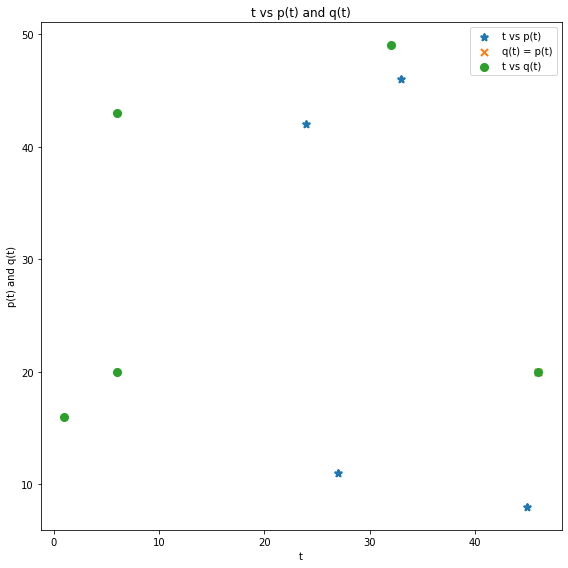

In [74]:
fig_width = 8

fig_height = 8

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, fig_height))

ax.set_xlabel('t')

ax.set_ylabel('p(t) and q(t)')

ax.set_title('t vs p(t) and q(t)')

ax.scatter(data_points[:math.floor(n/2),0],
           data_points[:math.floor(n/2),1], 
           marker="*",
           s = 50,
           linewidth=2,
           label = 't vs p(t)')

ax.scatter(data_points[math.floor(n/2),0],
           data_points[math.floor(n/2),1], 
           marker="x",
           s = 50,
           linewidth=2,
           label = 'q(t) = p(t)')

ax.scatter(data_points[math.floor(n/2):,0],
           data_points[math.floor(n/2):,1], 
           marker="o",
           s = 50,
           linewidth=2,
           label = 't vs q(t)')

plt.legend()

plt.tight_layout()

plt.show()

In [75]:
coefficients = calculate_coefficients(data_points, math.floor(data_points.shape[0]/2), float)   

print("Coefficient: {0}".format(coefficients), coefficients.shape)

Coefficient: [-1.66923992e+18  2.19052612e+17 -1.06005790e+16  2.23772654e+14
 -1.73467173e+12 -3.41803119e+15  4.17038284e+15 -7.85169094e+14
  3.32125885e+13 -3.95136991e+11] (10,)


-1.6692399169488358e+18 -3418031192604189.5
2.1905261199690477e+17 4170382835123757.0
-1.0600578971270624e+16 -785169093981106.1
223772653787253.94 33212588452862.01
-1734671734784.9126 -395136991232.0


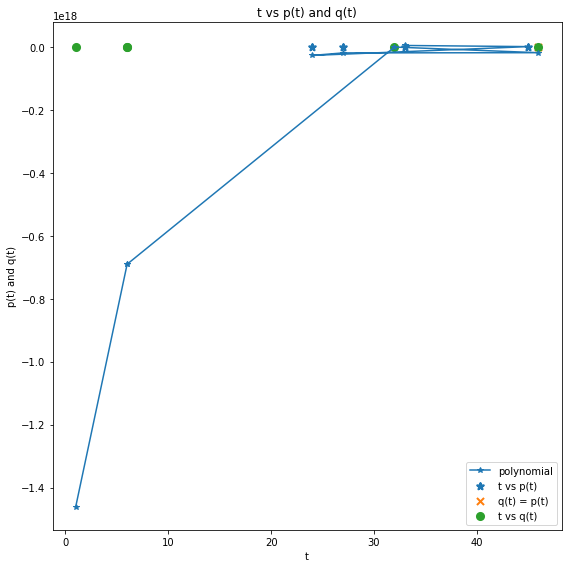

In [76]:
fig_width = 8

fig_height = 8

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, fig_height))

ax.set_xlabel('t')

ax.set_ylabel('p(t) and q(t)')

ax.set_title('t vs p(t) and q(t)')

ax.scatter(data_points[:math.floor(n/2),0],
           data_points[:math.floor(n/2),1], 
           marker="*",
           s = 50,
           linewidth=2,
           label = 't vs p(t)')

ax.scatter(data_points[math.floor(n/2),0],
           data_points[math.floor(n/2),1], 
           marker="x",
           s = 50,
           linewidth=2,
           label = 'q(t) = p(t)')

ax.scatter(data_points[math.floor(n/2):,0],
           data_points[math.floor(n/2):,1], 
           marker="o",
           s = 50,
           linewidth=2,
           label = 't vs q(t)')

ax.plot(data_points[:,0],
        p(coefficients, data_points[:,0]), 
        marker="*",
        label = 'polynomial')

plt.legend()

plt.tight_layout()

plt.show()

**Q3: Least-square Polynomial Fitting**

Now we will fit a quadratic polynomial 

$p(t) = c_{0} + c_{1}t + c_{2}t
^{2}$

to the $n = 7$ points. Of course, we do not require here that all the conditions will be satisfied. We wish to find a polynomial that minimized the sum of squared errors at each $t_{i}$

The 7 points are as follows

In [77]:
data_points = np.array([[1, 4], 
                        [3, 7], 
                        [4, 2], 
                        [7, 2],
                        [10, 5], 
                        [12, 10], 
                        [15, 4]])

print(data_points, data_points.shape)

[[ 1  4]
 [ 3  7]
 [ 4  2]
 [ 7  2]
 [10  5]
 [12 10]
 [15  4]] (7, 2)


1. Plot the data points

No handles with labels found to put in legend.


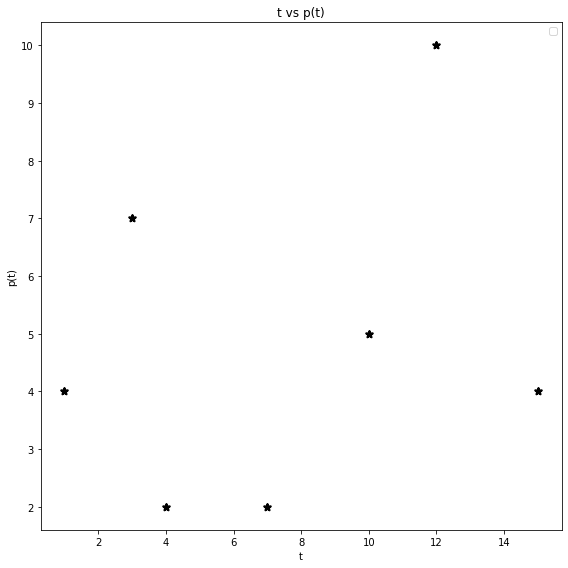

In [78]:
fig_width = 8

fig_height = 8

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, fig_height))

ax.set_xlabel('t')

ax.set_ylabel('p(t)')

ax.set_title('t vs p(t)')

ax.scatter(data_points[:,0],
           data_points[:,1], 
           marker="*",
           s = 50, 
           color="black", 
           linewidth=2)

plt.legend()

plt.tight_layout()

plt.show()

2. Minimize $Ac = y$ and find $\hat{c}$

* $Ac = y$, is unlikely to have a solution and so we aim to find $\hat{c}$, that minimizes $∥ A\hat{c} − y ∥^{2}$

  $∥ A\hat{c} − y ∥^{2} = (A\hat{c} - y)^{T}(A\hat{c} - y)$

  $∥ A\hat{c} − y ∥^{2} = (\hat{c}^{T}A^{T} - y^{T})(A\hat{c} - y)$

  $∥ A\hat{c} − y ∥^{2} = \hat{c}^{T}A^{T}A\hat{c} - \hat{c}^{T}A^{T}y - y^{T}A\hat{c} + y^{T}y$

  $∥ A\hat{c} − y ∥^{2} = \hat{c}^{T}A^{T}A\hat{c} - 2\hat{c}^{T}A^{T}y + y^{T}y$

  Now let,

  $\frac{δ∥ A\hat{c} − y ∥^{2}}{δ\hat{c}}=0$

  So,

  $2A^{T}A\hat{c} - 2A^{T}y=0$

  $2A^{T}A\hat{c} = 2A^{T}y$

  $A^{T}A\hat{c} = A^{T}y$

  $\hat{c} =(A^{T}A)^{-1}A^{T}y$





* The Normal Equations (Another Approach)
  
  $\hat{c}$ is a least squares solution of $Ac = y$

  $A\hat{c} − y$ is as small as possible

  $A\hat{c} − y$ is orthogonal to $Col(A)$

  $A\hat{c} − y$ is in $Nul(A^{T})$

  $A^{T}(A\hat{c} − y) = 0$

  $A^{T}A\hat{c} = A^{T}y$

  $\hat{c} = (A^{T}A)^{-1}A^{T}y$


3. Set up a system of equations $Ac = y$ that corresponds to the points.

In [79]:
def generate_vandermonde_matrix(data_points, degree, data_type):

  A = []

  for i, data_point in enumerate(data_points[:,0]):

    row = []

    for exponent in range(degree+1):

      row.append(data_point**exponent)

    A.append(row)

  return np.array(A, dtype=data_type)

A = generate_vandermonde_matrix(data_points, 2, float)

print(A, A.shape)

[[  1.   1.   1.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   7.  49.]
 [  1.  10. 100.]
 [  1.  12. 144.]
 [  1.  15. 225.]] (7, 3)


4. Calculate the coefficients using QR factorization.

In [80]:
def calculate_coefficients_qr(data_points, degree, data_type):

  vandermonde_matrix = generate_vandermonde_matrix(data_points, degree, data_type)

  print(vandermonde_matrix)

  Q,R = qr_factorization(vandermonde_matrix)
  
  R_inverse = np.linalg.inv(R)

  c = np.dot(np.dot(R_inverse, Q.T), data_points[:, 1])

  return c

coefficients = calculate_coefficients_qr(data_points, 2, float)   

print("Coefficient: {0}".format(coefficients), coefficients.shape)

[[  1.   1.   1.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   7.  49.]
 [  1.  10. 100.]
 [  1.  12. 144.]
 [  1.  15. 225.]]
Coefficient: [12.85079208  1.94519235  0.16644838] (3,)


6. Calculate the coefficients using pseudo inverse.

In [81]:
def calculate_coefficients(data_points, degree, data_type):

  vandermonde_matrix = generate_vandermonde_matrix(data_points, degree, data_type)

  vandermonde_transpose_vandermonde = np.dot(vandermonde_matrix.T, vandermonde_matrix)

  vandermonde_transpose_vandermonde_inverse = np.linalg.inv(vandermonde_transpose_vandermonde)

  vandermonde_transpose_vandermonde_inverse_vandermonde_transpose = np.dot(vandermonde_transpose_vandermonde_inverse, vandermonde_matrix.T)

  c = np.dot(vandermonde_transpose_vandermonde_inverse_vandermonde_transpose, data_points[:, 1])

  return c

coefficients = calculate_coefficients(data_points, 2, float)   

print("Coefficient: {0}".format(coefficients), coefficients.shape)

Coefficient: [3.84514148e+00 9.98777732e-02 3.47493640e-03] (3,)


5. Write a function that takes the coefficents and the independent value to produce an output.

In [82]:
def p(coefficients, x):

  result = 0

  for i, coefficient in enumerate(coefficients):

    result = result + coefficient * x**i

  return result 

output = p(coefficients, 15)

print("Output: {0}".format(output))

Output: 6.125168772473399


6. Plot the points and the Polynomial.

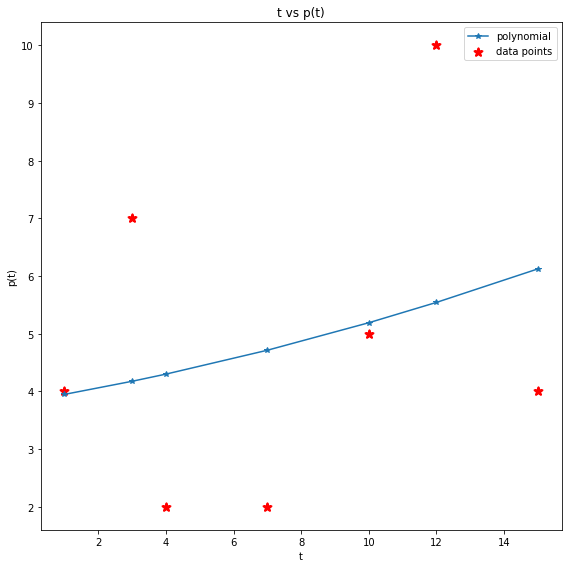

In [83]:
fig_width = 8

fig_height = 8

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, fig_height))

ax.set_xlabel('t')

ax.set_ylabel('p(t)')

ax.set_title('t vs p(t)')

ax.scatter(data_points[:,0],
           data_points[:,1], 
           marker="*",
           s = 70,
           color = 'red', 
           linewidth=2,
           label = 'data points')

ax.plot(data_points[:,0],
        p(coefficients, data_points[:,0]), 
        marker="*",
        label = 'polynomial')

plt.legend()

plt.tight_layout()

plt.show()

7. Calculate the coefficients for degree 6 and plot again.

In [84]:
coefficients = calculate_coefficients(data_points, 6, float)   

print("Coefficient: {0}".format(coefficients), coefficients.shape)

Coefficient: [-3.37575757e+01  6.28880228e+01 -3.12842230e+01  6.86690312e+00
 -7.52765749e-01  4.04882153e-02 -8.49767512e-04] (7,)


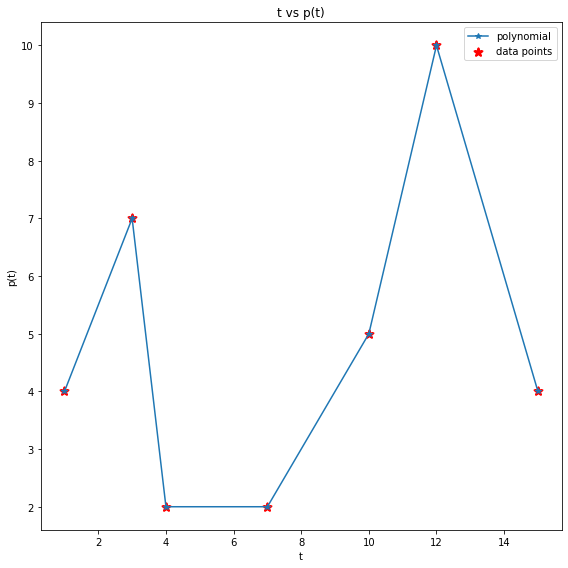

In [85]:
fig_width = 8

fig_height = 8

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, fig_height))

ax.set_xlabel('t')

ax.set_ylabel('p(t)')

ax.set_title('t vs p(t)')

ax.scatter(data_points[:,0],
           data_points[:,1], 
           marker="*",
           s = 70,
           color = 'red', 
           linewidth=2,
           label = 'data points')

ax.plot(data_points[:,0],
        p(coefficients, data_points[:,0]), 
        marker="*",
        label = 'polynomial')

plt.legend()

plt.tight_layout()

plt.show()